<a href="https://colab.research.google.com/github/WarMachineRock/Data_Visualitation/blob/main/PROJECT%20FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN

Mounted at /content/drive
Image shape: (100, 150, 150, 3)
Image dtype: float64
4/4 [==============================] - 2s 373ms/step
Disease Counts in First 100 Images:
Disease Name
Cassava Bacterial Blight (CBB)    100
Name: count, dtype: int64


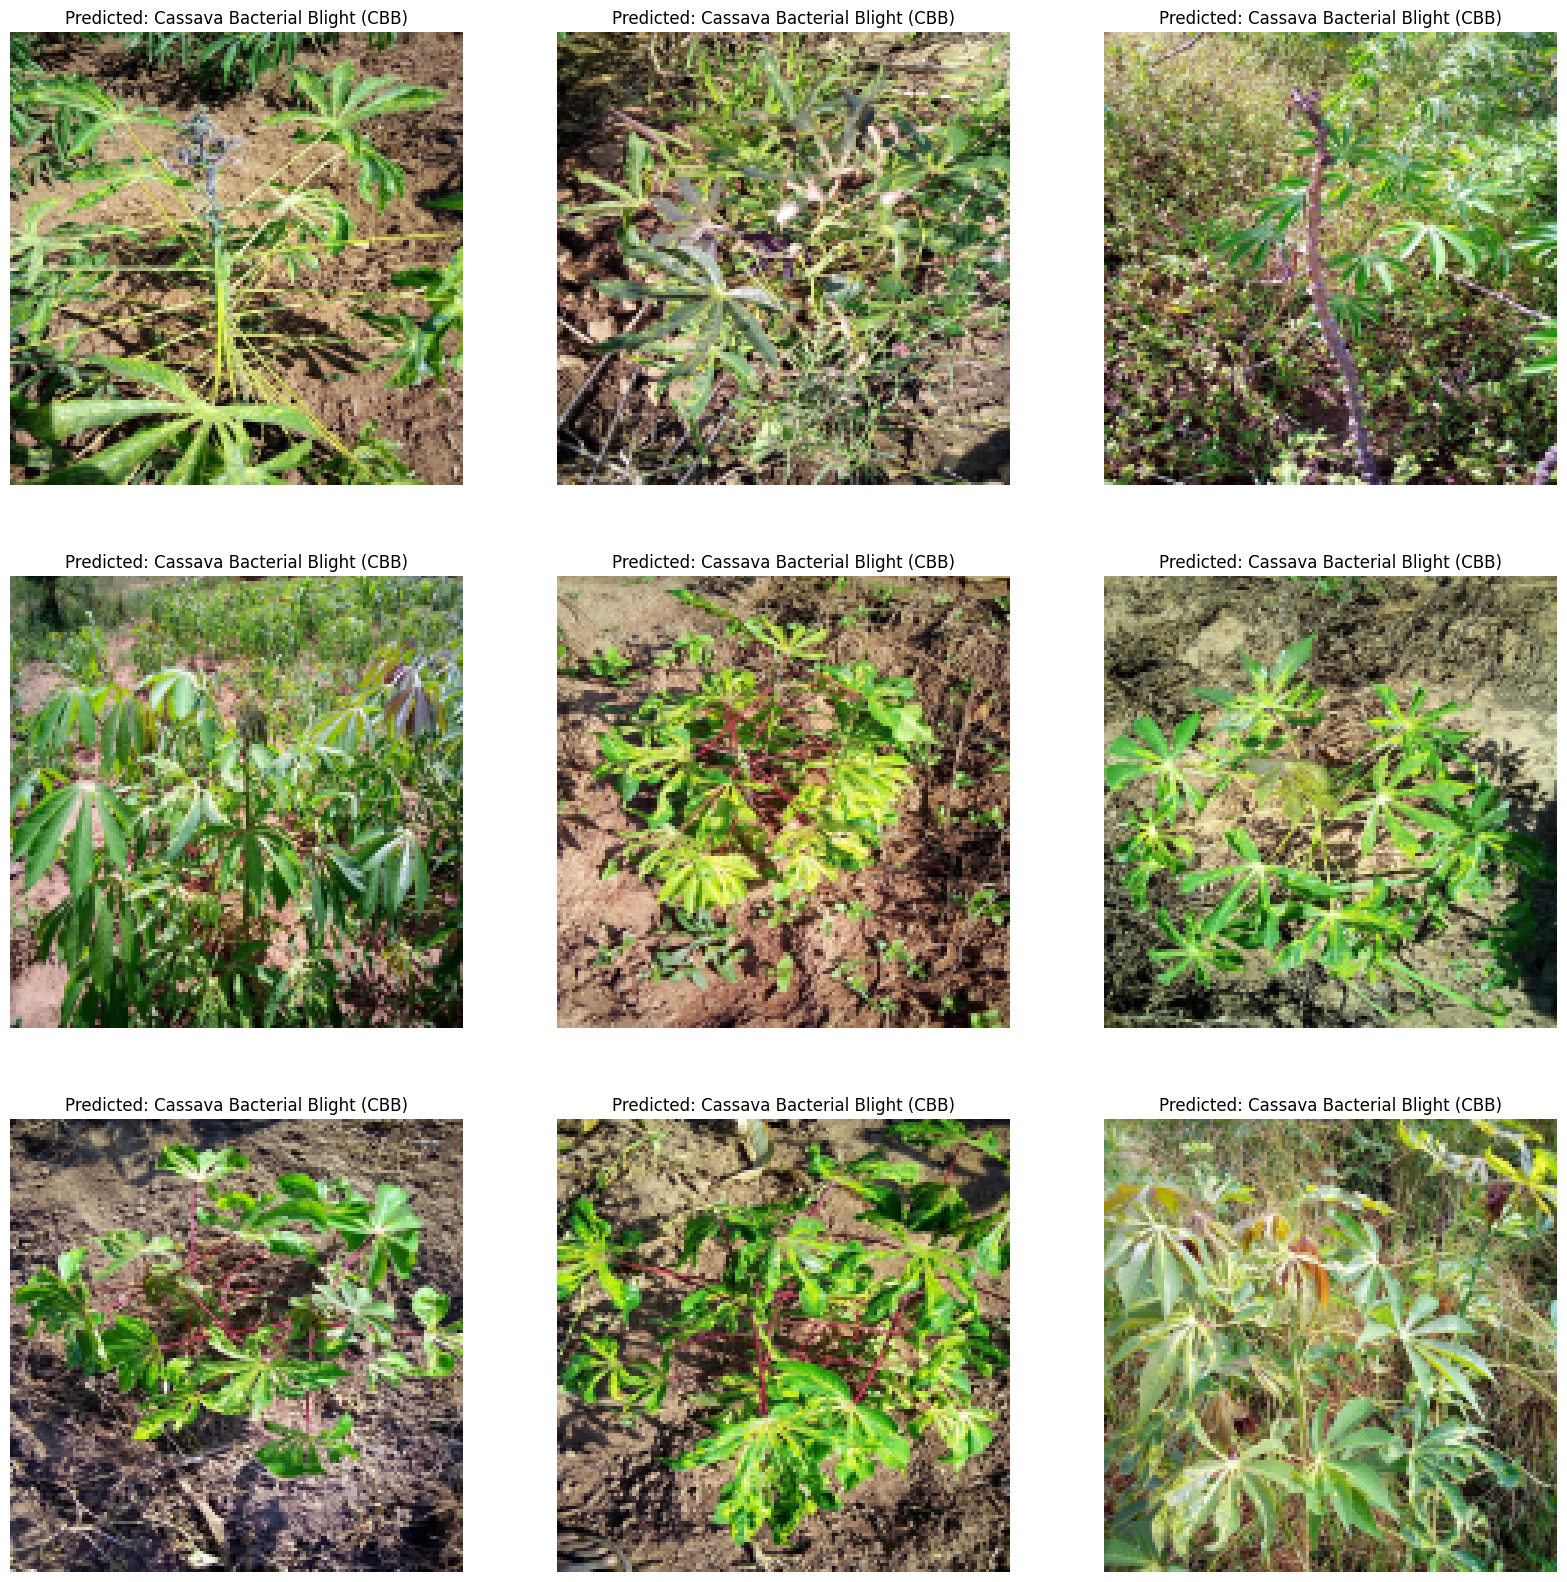

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Specify the directory
data_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/data/cassava-leaf-disease-dataset'

# Check if the CSV file exists
csv_path = os.path.join(data_dir, 'labels.csv')
if not os.path.exists(csv_path):
    print("Error: labels.csv file not found.")
else:
    # Load the DataFrame with image filenames and class labels
    df = pd.read_csv(csv_path)

    # Load and preprocess images using OpenCV
    images = []
    filenames = []
    for filename in df['filename'][:100]:  # Load the first 100 images
        img_path = os.path.join(data_dir, filename)
        img = cv2.imread(img_path)
        if img is not None:  # Check if the image is loaded properly
            img = cv2.resize(img, (150, 150), interpolation=cv2.INTER_AREA)  # Resize image using INTER_AREA
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            images.append(img)
            filenames.append(filename)
        else:
            print(f"Warning: {filename} could not be read.")

    # Convert image list to numpy array
    images = np.array(images)

    # Normalize images
    images = images / 255.0

    # Ensure that images have the correct shape and type
    print(f"Image shape: {images.shape}")
    print(f"Image dtype: {images.dtype}")

    # Load pre-trained model
    model_path = '/content/drive/MyDrive/Colab Notebooks/cassava_leaf_disease_model.h5'
    model = load_model(model_path)

    # Perform predictions
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Map predicted class indices to disease names
    class_names = {0: 'Cassava Bacterial Blight (CBB)',
                   1: 'Cassava Brown Streak Disease (CBSD)',
                   2: 'Cassava Green Mottle (CGM)',
                   3: 'Cassava Mosaic Disease (CMD)',
                   4: 'Healthy'}

    # Create a DataFrame with results
    results = pd.DataFrame({
        'Filename': filenames,
        'Predicted Class': predicted_classes
    })

    results['Disease Name'] = results['Predicted Class'].map(class_names)

    # Count the number of diseased leaves
    diseased_counts = results['Disease Name'].value_counts()

    print("Disease Counts in First 100 Images:")
    print(diseased_counts)

    # Display some of the images along with their predicted disease names
    num_images_to_display = 9
    plt.figure(figsize=(20, 20))
    for i in range(num_images_to_display):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"Predicted: {results.iloc[i]['Disease Name']}")
        plt.axis('off')
    plt.show()


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Convert images for KNN
images_flattened = []
for filename in df['filename']:
    img_path = os.path.join(data_dir, filename)
    img = imread(img_path)
    img = resize(img, (100, 100))  # Resize image to the desired size
    img_flat = img.flatten()  # Flatten the image
    images_flattened.append(img_flat)

# Convert flattened images to numpy array
images_flattened = np.array(images_flattened)

# Split data into training and testing sets for KNN
X_train, X_test, y_train, y_test = train_test_split(images_flattened, df['class'], test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set for KNN
knn_y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(knn_y_pred, y_test)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.55


SVM

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm = SVC(kernel='linear')

# Train SVM classifier
svm.fit(X_train, y_train)

# Make predictions on the test set for SVM
svm_y_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(svm_y_pred, y_test)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9


Cassava

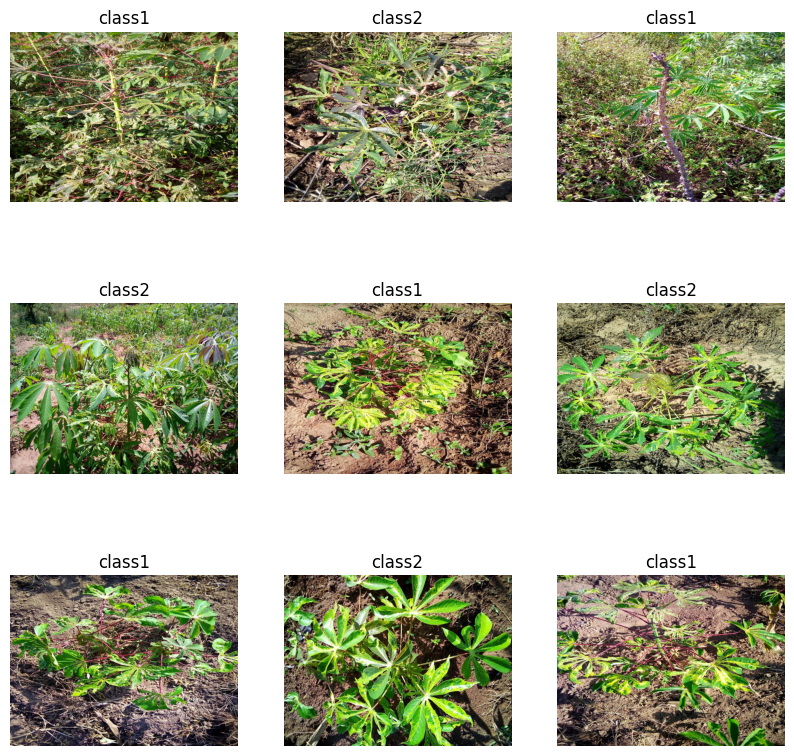

In [ ]:
# Menampilkan 9 gambar daun cassava
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Menentukan indeks gambar yang akan ditampilkan
start_index = 0

for i in range(3):
    for j in range(3):
        index = start_index + i*3 + j  # Menghitung indeks gambar
        img_path = os.path.join(data_dir, df['filename'][index])  # Path gambar
        image = imread(img_path)  # Baca gambar
        axes[i, j].imshow(image)  # Menampilkan gambar
        axes[i, j].axis('off')  # Hilangkan sumbu x dan y
        axes[i, j].set_title(df['class'][index])  # Tampilkan label kelas sebagai judul

plt.show()


Grafik

Epoch 1/10
3/3 [==============================] - 9s 3s/step - loss: 0.0844 - accuracy: 0.9875 - val_loss: 0.1642 - val_accuracy: 0.9000
Epoch 2/10
3/3 [==============================] - 5s 1s/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 0.2264 - val_accuracy: 0.9000
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 0.1414 - val_accuracy: 0.9000
Epoch 4/10
3/3 [==============================] - 7s 3s/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.2098 - val_accuracy: 0.9000
Epoch 5/10
3/3 [==============================] - 5s 1s/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.1585 - val_accuracy: 0.9000
Epoch 6/10
3/3 [==============================] - 7s 2s/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.1735 - val_accuracy: 0.9000
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.4424 - val_accuracy: 0.9000
Epoch 8/10
3/3 [=========================

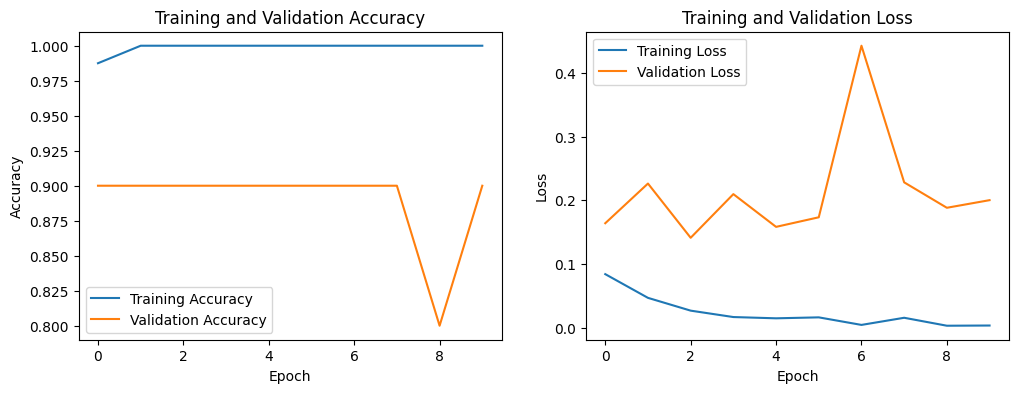

In [ ]:
from keras.utils import to_categorical

# Convert class labels to one-hot encoding
y_train_cnn = to_categorical(y_train_cnn)
y_test_cnn = to_categorical(y_test_cnn)


# Train CNN model
cnn_history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, validation_data=(X_test_cnn, y_test_cnn))

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
